In [729]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sckit-learn library is used for spilting and Fischer-Discriminant only.
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import math
from random import Random

In [794]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [623]:
data_shuffled = data.sample(frac = 1)
print(data_shuffled.shape)
data_shuffled.head()

(569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
20   8510653         B        13.08         15.71           85.63      520.0   
84   8612080         B        12.00         15.65           76.95      443.3   
309   893548         B        13.05         13.84           82.71      530.6   
77   8610637         M        18.05         16.15          120.20     1006.0   
38    855133         M        14.99         25.20           95.54      698.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
20           0.10750           0.12700        0.045680             0.031100   
84           0.09723           0.07165        0.041510             0.018630   
309          0.08352           0.03735        0.004559             0.008829   
77           0.10650           0.21460        0.168400             0.108000   
38           0.09387           0.05131        0.023980             0.028990   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
20   ...         14.50          20.49            96.09       630.5   
84   ...         13.67          24.90            87.78       567.9   
309  ...         14.73          17.40            93.96       672.4   
77   ...         22.39          18.91           150.10      1610.0   
38   ...         14.99          25.20            95.54       698.8   

     smoothness_worst  compactness_worst  concavity_worst  \
20            0.13120            0.27760          0.18900   
84            0.13770            0.20030          0.22670   
309           0.10160            0.05847          0.01824   
77            0.14780            0.56340          0.37860   
38            0.09387            0.05131          0.02398   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
20                0.07283          0.3184                  0.08183  
84                0.07632          0.3379                  0.07924  
309               0.03532          0.2107                  0.06580  
77                0.21020          0.3751                  0.11080  
38                0.02899          0.1565                  0.05504  

[5 rows x 32 columns]

In [642]:
X = data.drop(['diagnosis', 'id'], axis=1)
X_shuffled = data_shuffled.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y_shuffled = data_shuffled['diagnosis']
y = y.replace({'M' : 1, 'B' : -1})
y_shuffled = y_shuffled.replace({'M' : 1, 'B' : -1})
print(f'X shape: {X.shape}')
print(f'X shuffled shape: {X_shuffled.shape}')
print(f'y shape: {y.shape}')
print(f'y shuffled shape: {y_shuffled.shape}')
print(y.unique())

X shape: (569, 30)
X shuffled shape: (569, 30)
y shape: (569,)
y shuffled shape: (569,)
[ 1 -1]


In [ ]:
def train_test_split(X, y, test_size):
    print(X.iloc[0, 0])
    X_train = X.iloc[:int(X.shape[0] * (1-test_size)),:]
    X_test = X.iloc[int(X.shape[0] * (1-test_size)):,:]
    y_train = y.iloc[:int(y.shape[0] * (1-test_size))]
    y_test = y.iloc[int(y.shape[0] * (1-test_size)):]
    print(X_train.iloc[0, 0])
    return X_train, X_test, y_train, y_test

def featureEngineering1(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = X.iloc[:,i].fillna(X.iloc[:,i].mean())
    return X

def featureEngineering2(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean()) / X.iloc[:,i].std()    
    return X

PART A

In [ ]:
def perceptron(X, y):
    features = X.shape[1]
    # print(features)
    weights = np.zeros(features)
    accuracy = [0]
    iter = [0]
    # print(weights)
    for j in range(10000):
        flag = True
        for index, row in X.iterrows():
            if(y[index] * (np.dot(weights.T, row)) <= 0):
                # print("Index: ", index)
                flag = False
                weights = weights + y[index] * row
                break
        predictions = y * np.dot(X, weights)
        predictions = predictions > 0
        # print(weights)
        if j%100 == 0:
            if j%1000 == 0:
                print(f'Accuracy at iteration {j} : {100 * (predictions.sum()/X.shape[0])}')
            accuracy.append(100 * (predictions.sum()/X.shape[0]))
            iter.append(j)
        if flag:
            break    
    return weights, accuracy, iter

def predict(X, y, weights):
    predictions = y * np.dot(X, weights)
    predictions = predictions > 0
    return predictions.sum()/X.shape[0]

PM1

PM1: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 44.35695538057743
Accuracy at iteration 1000 : 82.93963254593176
Accuracy at iteration 2000 : 72.17847769028872
Accuracy at iteration 3000 : 73.49081364829397
Accuracy at iteration 4000 : 44.35695538057743
Accuracy at iteration 5000 : 72.44094488188976
Accuracy at iteration 6000 : 74.2782152230971
Accuracy at iteration 7000 : 75.8530183727034
Accuracy at iteration 8000 : 45.14435695538058
Accuracy at iteration 9000 : 45.14435695538058

Accuracy of PM1 on test data: 43.08510638297872


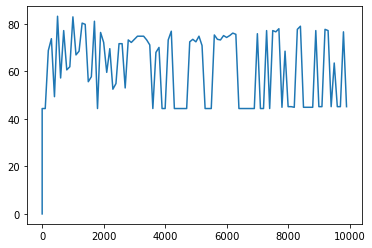

In [648]:
X_PM1 = featureEngineering1(X)
X_train, X_test, y_train, y_test = train_test_split(X_PM1, y, 0.33)
print(f'PM1: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM1 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM2

PM2: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 63.25459317585301
Accuracy at iteration 1000 : 60.367454068241464
Accuracy at iteration 2000 : 72.70341207349081
Accuracy at iteration 3000 : 59.84251968503938
Accuracy at iteration 4000 : 82.93963254593176
Accuracy at iteration 5000 : 67.45406824146981
Accuracy at iteration 6000 : 85.56430446194226
Accuracy at iteration 7000 : 70.86614173228347
Accuracy at iteration 8000 : 83.2020997375328
Accuracy at iteration 9000 : 75.06561679790026

Accuracy of PM2 on test data: 73.40425531914893


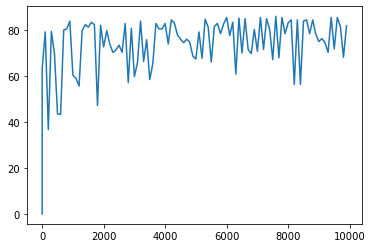

In [249]:
X_PM2 = featureEngineering1(X_shuffled)
X_train, X_test, y_train, y_test = train_test_split(X_PM2, y_shuffled, 0.33)
print(f'PM2: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM2 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM3

PM3: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 87.4015748031496
Accuracy at iteration 1000 : 98.4251968503937
Accuracy at iteration 2000 : 97.63779527559055
Accuracy at iteration 3000 : 98.16272965879264
Accuracy at iteration 4000 : 97.63779527559055
Accuracy at iteration 5000 : 98.16272965879264
Accuracy at iteration 6000 : 98.9501312335958
Accuracy at iteration 7000 : 98.9501312335958
Accuracy at iteration 8000 : 99.47506561679789
Accuracy at iteration 9000 : 98.16272965879264

Accuracy of PM3 on test data: 93.08510638297872


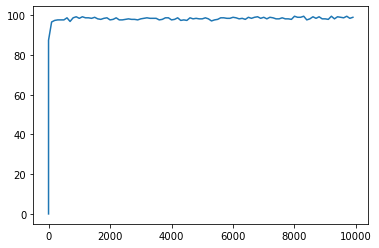

In [272]:
X_PM3 = featureEngineering1(X)
X_PM3 = featureEngineering2(X_PM3)
X_train, X_test, y_train, y_test = train_test_split(X_PM3, y, 0.33)
print(f'PM3: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM3 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()

PM4

PM4: Train X - (381, 30), Test X - (188, 30), Train Y - (381,), Test Y - (188,)

Accuracy at iteration 0 : 87.4015748031496
Accuracy at iteration 1000 : 98.4251968503937
Accuracy at iteration 2000 : 97.63779527559055
Accuracy at iteration 3000 : 98.16272965879264
Accuracy at iteration 4000 : 97.63779527559055
Accuracy at iteration 5000 : 98.16272965879264
Accuracy at iteration 6000 : 98.9501312335958
Accuracy at iteration 7000 : 98.9501312335958
Accuracy at iteration 8000 : 99.47506561679789
Accuracy at iteration 9000 : 98.16272965879264

Accuracy of PM4 on test data: 93.08510638297872


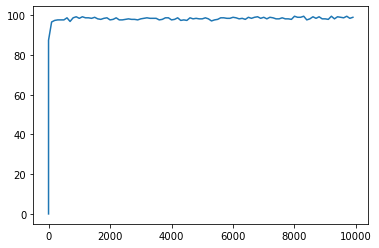

In [273]:
X_PM4 = featureEngineering1(X.sample(frac = 1, axis='columns'))
X_train, X_test, y_train, y_test = train_test_split(X_PM4, y, 0.33)
print(f'PM4: Train X - {X_train.shape}, Test X - {X_test.shape}, Train Y - {y_train.shape}, Test Y - {y_test.shape}\n')
weights, acc, iter = perceptron(X_train, y_train)
print(f'\nAccuracy of PM4 on test data: {100 * predict(X_test, y_test, weights)}')
plt.plot(iter, acc)
plt.show()


PART B

In [913]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
data = pd.read_csv('data.csv')
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y = y.replace({'M' : 0, 'B' : 1})
X = featureEngineering1(X)

[[1.74328591e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
  1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
  1.92908962e-01 6.26800943e-02 6.09082547e-01 1.21091462e+00
  4.32392925e+00 7.26724057e+01 6.78009434e-03 3.22811651e-02
  4.18240094e-02 1.50604717e-02 2.04724009e-02 4.06240566e-03
  2.11348113e+01 2.93182075e+01 1.41370330e+02 1.42228632e+03
  1.44845236e-01 3.74824104e-01 4.50605566e-01 1.82237311e-01
  3.23467925e-01 9.15299528e-02]
 [1.21465238e+01 1.79147619e+01 7.81621666e+01 4.62790196e+02
  9.24776471e-02 8.00846218e-02 4.62576345e-02 2.57174062e-02
  1.74185994e-01 6.28673950e-02 2.84082353e-01 1.22038011e+00
  2.00032129e+00 2.11351485e+01 7.19590196e-03 2.14186270e-02
  2.59967356e-02 9.85765266e-03 2.05838067e-02 3.63605126e-03
  1.33798011e+01 2.35150700e+01 8.70059384e+01 5.60205336e+02
  1.24959496e-01 1.82672549e-01 1.66663088e-01 7.44443445e-02
  2.70245938e-01 7.94420728e-02]]


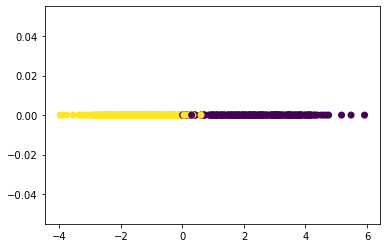

In [917]:
lda = LinearDiscriminantAnalysis(n_components=1)
proj = lda.fit_transform(X, y)
print(lda.means_)
plt.scatter(proj, np.zeros(proj.shape[0]), c=y)
plt.show()

PART C

In [855]:
data = pd.read_csv('data.csv')
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y = y.replace({'M' : 0, 'B' : 1})
X = featureEngineering1(X)

In [852]:
class LogisticRegression:
    def sigmoid(self, x):
        return 1/(1+np.exp(-x)) + 1e-15

    def cost_function(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + ((1-y) * np.log(1-y_hat)))

    def predictLogistic(self, X, y, weights, bias, threshold):
        predictions = self.sigmoid(np.dot(X, weights) + bias) > threshold
        return 100 * predictions.sum()/X.shape[0]

    def batchGradientDescent(self, X, y, iter, learning_rate):
        weights = np.zeros(X.shape[1])
        bias = 0
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            y_hat = self.sigmoid(np.dot(X, weights) + bias)

            cost = self.cost_function(y, y_hat)
            cost_history.append(cost)
            iterations.append(i)

            weights = weights - (learning_rate/m) * np.dot(X.T, (y_hat - y))
            bias = bias - (learning_rate/m) * np.sum(y_hat - y)

            # if i%1000 == 0:
            #     print(f'Cost at iteration {i} : {cost}')

        return weights, bias, cost_history, iterations

    def stochasticGradientDescent(self, X, y, iter, learning_rate):
        weights = np.zeros(X.shape[1])
        bias = 0
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            k = np.random.randint(0, m)
            X_curr = X.iloc[k, :]
            y_curr = y.iloc[k]

            y_hat = self.sigmoid(np.dot(X_curr, weights) + bias)

            cost = self.cost_function(y_curr, y_hat)
            cost_history.append(cost)
            iterations.append(i)

            weights = weights - (learning_rate/m) * np.dot(X_curr.T, (y_hat - y_curr))
            bias = bias - (learning_rate/m) * np.sum(y_hat - y_curr)

            # if i%1000 == 0:
            #     print(f'Cost at iteration {i} : {cost}')

        return weights, bias, cost_history, iterations

    def miniBatchGradientDescent(self, X, y, iter, learning_rate, batch_size):
        weights = np.zeros(X.shape[1])
        bias = 0
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            k = np.random.randint(0, m-batch_size+1)
            X_curr = X.iloc[k:k+batch_size, :]
            y_curr = y.iloc[k:k+batch_size]
            y_hat = self.sigmoid(np.dot(X_curr, weights) + bias)

            cost = self.cost_function(y_curr, y_hat)
            cost_history.append(cost)
            iterations.append(i)

            weights = weights - (learning_rate/m) * np.dot(X_curr.T, (y_hat - y_curr))
            bias = bias - (learning_rate/m) * np.sum(y_hat - y_curr)

            # if i%1000 == 0:
            #     print(f'Cost at iteration {i} : {cost}')

        return weights, bias, cost_history, iterations         

In [857]:
LogisticRegression = LogisticRegression()
threshold = [0.3, 0.4, 0.6, 0.7]
learning_rates = [0.01, 0.001, 0.0001]

In [858]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.33)
X = featureEngineering2(X)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.33)

In [859]:
for alpha in learning_rates:
    weights, bias, cost_history, iterations = LogisticRegression.batchGradientDescent(X_train1, y_train1, 10000, alpha)
    for thresh in threshold:
        accuracy = LogisticRegression.predictLogistic(X_test1, y_test1, weights, bias, thresh)
        print(f'Accuracy of LR1 with learning rate {alpha} and threshold {thresh} : {accuracy}')
print('\n')
for alpha in learning_rates:
    weights, bias, cost_history, iterations = LogisticRegression.batchGradientDescent(X_train2, y_train2, 10000, alpha)
    for thresh in threshold:
        accuracy = LogisticRegression.predictLogistic(X_test2, y_test2, weights, bias, thresh)
        print(f'Accuracy of LR2 with learning rate {alpha} and threshold {thresh} : {accuracy}')

Accuracy of LR1 with learning rate 0.01 and threshold 0.3 : 69.14893617021276
Accuracy of LR1 with learning rate 0.01 and threshold 0.4 : 67.55319148936171
Accuracy of LR1 with learning rate 0.01 and threshold 0.6 : 65.42553191489361
Accuracy of LR1 with learning rate 0.01 and threshold 0.7 : 64.36170212765957
Accuracy of LR1 with learning rate 0.001 and threshold 0.3 : 71.80851063829788
Accuracy of LR1 with learning rate 0.001 and threshold 0.4 : 69.68085106382979
Accuracy of LR1 with learning rate 0.001 and threshold 0.6 : 65.42553191489361
Accuracy of LR1 with learning rate 0.001 and threshold 0.7 : 63.829787234042556
Accuracy of LR1 with learning rate 0.0001 and threshold 0.3 : 73.40425531914893
Accuracy of LR1 with learning rate 0.0001 and threshold 0.4 : 71.27659574468085
Accuracy of LR1 with learning rate 0.0001 and threshold 0.6 : 61.702127659574465
Accuracy of LR1 with learning rate 0.0001 and threshold 0.7 : 53.723404255319146


Accuracy of LR2 with learning rate 0.01 and thr

In [861]:
for alpha in learning_rates:
    weights, bias, cost_history, iterations = LogisticRegression.stochasticGradientDescent(X_train1, y_train1, 10000, alpha)
    for thresh in threshold:
        accuracy = LogisticRegression.predictLogistic(X_test1, y_test1, weights, bias, thresh)
        print(f'Accuracy of LR1 with learning rate {alpha} and threshold {thresh} : {accuracy}')
print('\n')
for alpha in learning_rates:
    weights, bias, cost_history, iterations = LogisticRegression.stochasticGradientDescent(X_train2, y_train2, 10000, alpha)
    for thresh in threshold:
        accuracy = LogisticRegression.predictLogistic(X_test2, y_test2, weights, bias, thresh)
        print(f'Accuracy of LR2 with learning rate {alpha} and threshold {thresh} : {accuracy}')

Accuracy of LR1 with learning rate 0.01 and threshold 0.3 : 82.97872340425532
Accuracy of LR1 with learning rate 0.01 and threshold 0.4 : 72.87234042553192
Accuracy of LR1 with learning rate 0.01 and threshold 0.6 : 51.59574468085106
Accuracy of LR1 with learning rate 0.01 and threshold 0.7 : 19.148936170212767
Accuracy of LR1 with learning rate 0.001 and threshold 0.3 : 100.0
Accuracy of LR1 with learning rate 0.001 and threshold 0.4 : 100.0
Accuracy of LR1 with learning rate 0.001 and threshold 0.6 : 0.0
Accuracy of LR1 with learning rate 0.001 and threshold 0.7 : 0.0
Accuracy of LR1 with learning rate 0.0001 and threshold 0.3 : 100.0
Accuracy of LR1 with learning rate 0.0001 and threshold 0.4 : 100.0
Accuracy of LR1 with learning rate 0.0001 and threshold 0.6 : 0.0
Accuracy of LR1 with learning rate 0.0001 and threshold 0.7 : 0.0


Accuracy of LR2 with learning rate 0.01 and threshold 0.3 : 80.31914893617021
Accuracy of LR2 with learning rate 0.01 and threshold 0.4 : 70.744680851063

In [863]:
for alpha in learning_rates:
    weights, bias, cost_history, iterations =LogisticRegression.miniBatchGradientDescent(X_train1, y_train1, 10000, alpha, 32)
    for thresh in threshold:   
        accuracy =LogisticRegression.predictLogistic(X_test1, y_test1, weights, bias, thresh)
        print(f'Accuracy of LR1 with learning rate {alpha} and threshold {thresh} : {accuracy}')
print('\n')
for alpha in learning_rates:
    weights, bias, cost_history, iterations =LogisticRegression.miniBatchGradientDescent(X_train2, y_train2, 10000, alpha, 32)
    for thresh in threshold:   
        accuracy =LogisticRegression.predictLogistic(X_test2, y_test2, weights, bias, thresh)
        print(f'Accuracy of LR2 with learning rate {alpha} and threshold {thresh} : {accuracy}')

Accuracy of LR1 with learning rate 0.01 and threshold 0.3 : 71.80851063829788
Accuracy of LR1 with learning rate 0.01 and threshold 0.4 : 69.68085106382979
Accuracy of LR1 with learning rate 0.01 and threshold 0.6 : 65.42553191489361
Accuracy of LR1 with learning rate 0.01 and threshold 0.7 : 63.829787234042556
Accuracy of LR1 with learning rate 0.001 and threshold 0.3 : 74.46808510638297
Accuracy of LR1 with learning rate 0.001 and threshold 0.4 : 72.34042553191489
Accuracy of LR1 with learning rate 0.001 and threshold 0.6 : 60.638297872340424
Accuracy of LR1 with learning rate 0.001 and threshold 0.7 : 53.191489361702125
Accuracy of LR1 with learning rate 0.0001 and threshold 0.3 : 97.34042553191489
Accuracy of LR1 with learning rate 0.0001 and threshold 0.4 : 86.17021276595744
Accuracy of LR1 with learning rate 0.0001 and threshold 0.6 : 12.23404255319149
Accuracy of LR1 with learning rate 0.0001 and threshold 0.7 : 0.0


Accuracy of LR2 with learning rate 0.01 and threshold 0.3 : 6